## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 36s 3us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


<h2> MLP + ReLU + ADAM </h2>

In [14]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.2285 - acc: 0.9315 - val_loss: 0.1244 - val_acc: 0.9628
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0841 - acc: 0.9752 - val_loss: 0.0858 - val_acc: 0.9733
Epoch 3/20
60000/600

Test score: 0.11049730623222204
Test accuracy: 0.9782


<IPython.core.display.Javascript object>


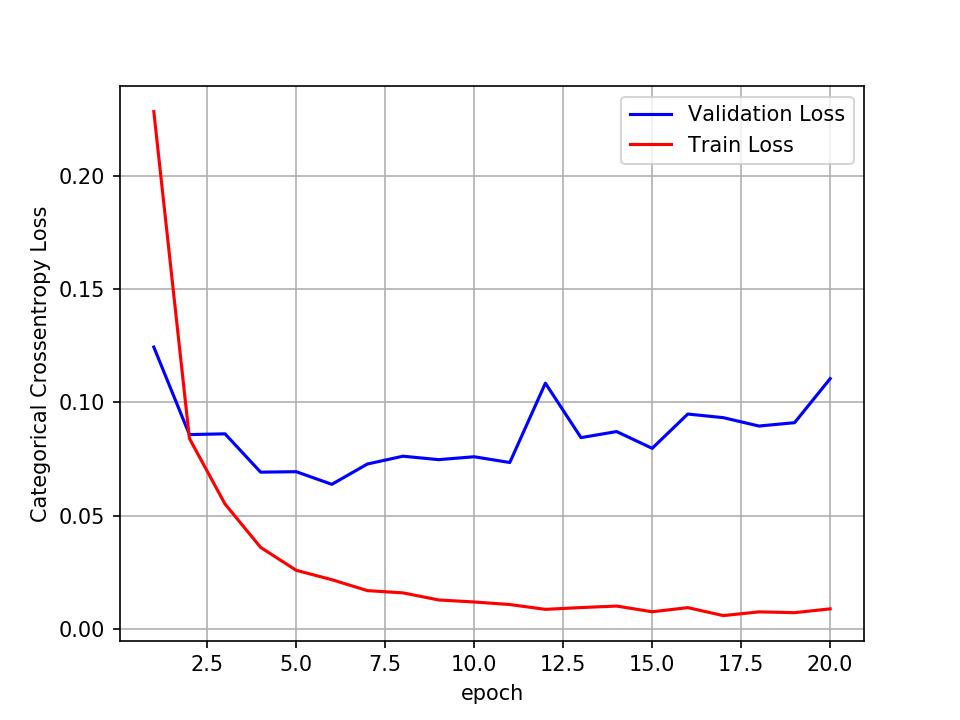

In [15]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


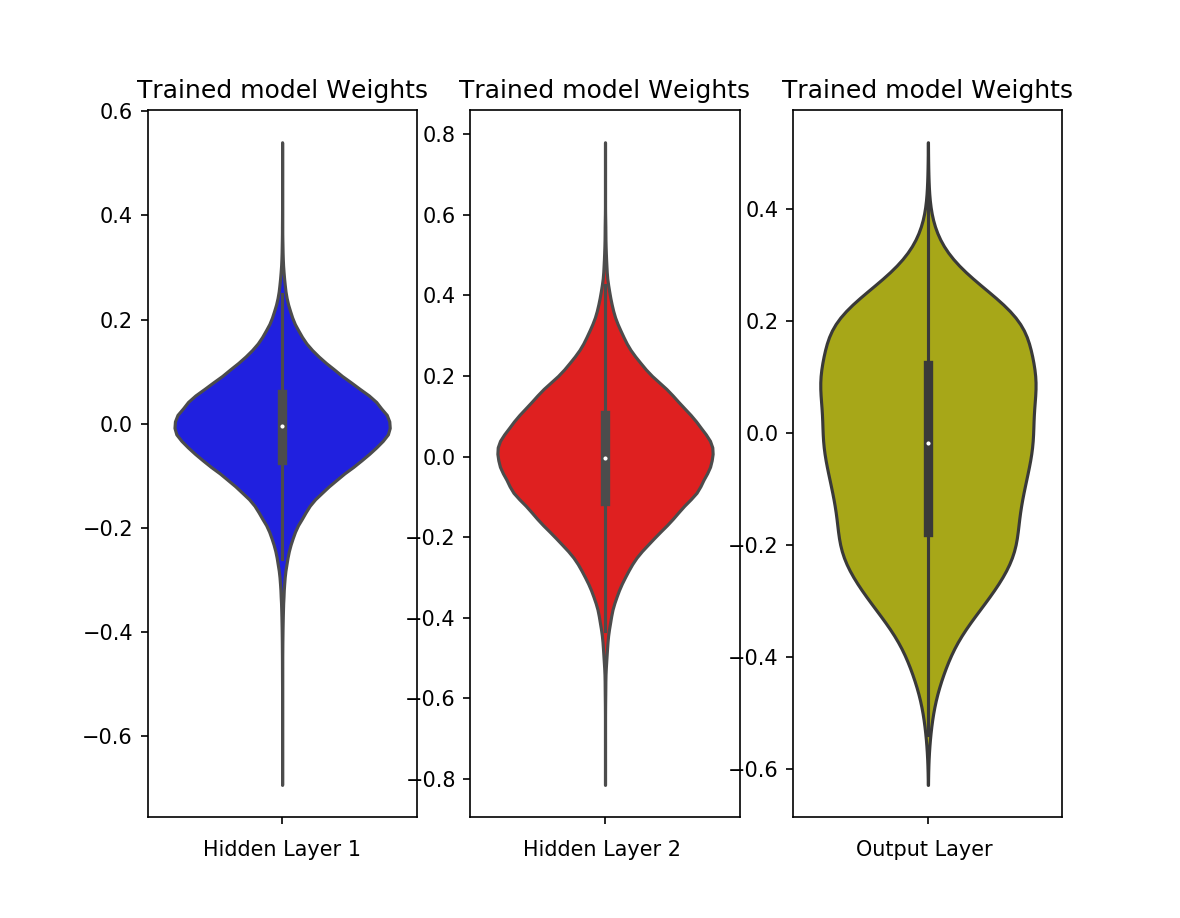

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [16]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [17]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [18]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.1957 - acc: 0.9418 - val_loss: 0.1083 - val_acc: 0.9673
Epoch 2/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0739 - acc: 0.9780 - val_loss: 0.0846 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0473 - acc: 0.9861 - val_loss: 0.0789 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0334 - acc: 0.9900 - val_loss: 0.0908 - val_acc: 0.9740
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0807 - val_acc: 0.9764
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0202 - acc: 0.9938 - val_loss: 0.0830 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0180 - acc: 0.9948 - val_loss: 0.0848 - 

Test score: 0.08957374464499307
Test accuracy: 0.9796


<IPython.core.display.Javascript object>


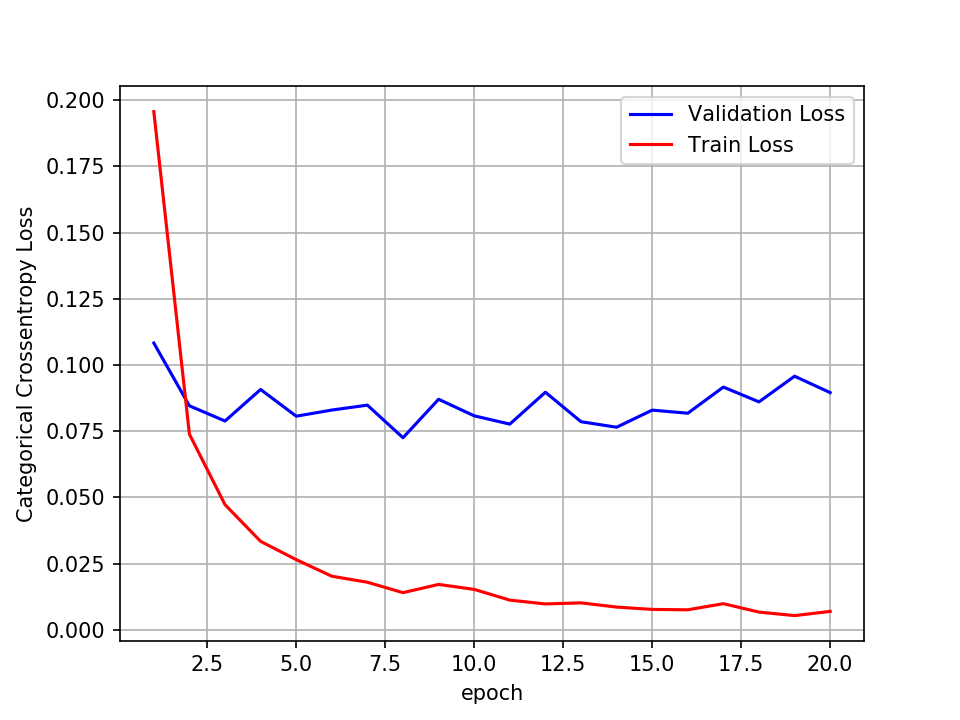

In [19]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


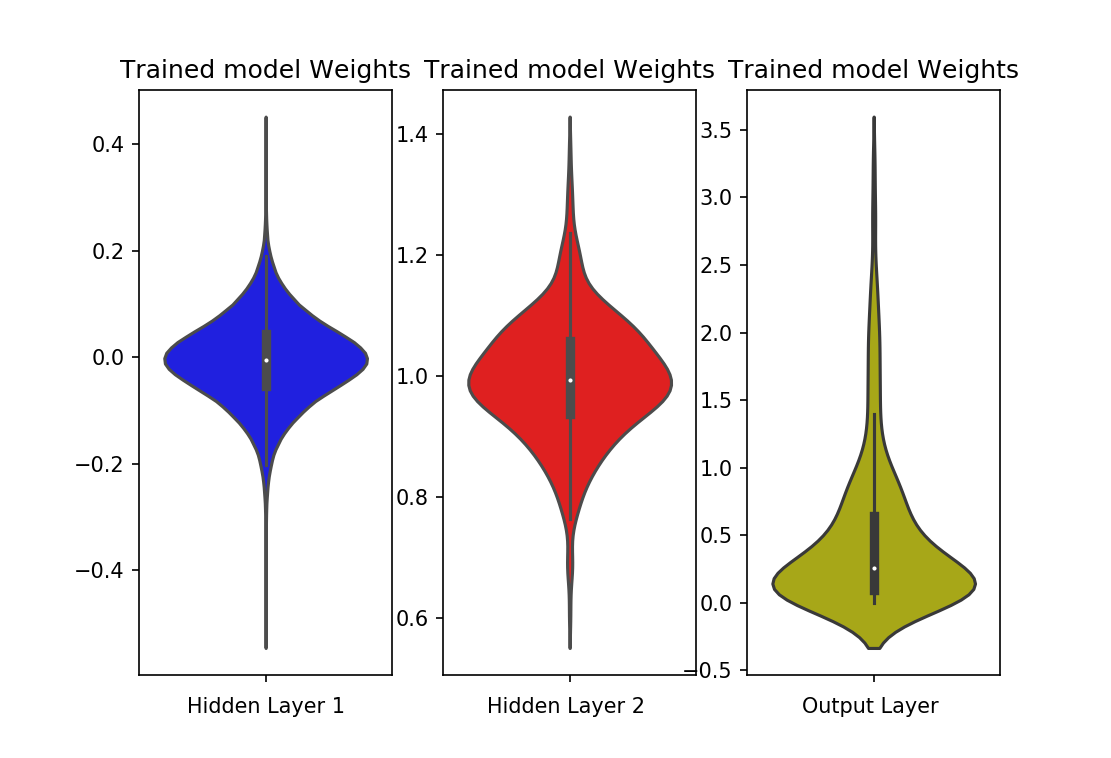

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [20]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [21]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [22]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.4832 - acc: 0.8527 - val_loss: 0.1690 - val_acc: 0.9470
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2546 - acc: 0.9240 - val_loss: 0.1276 - val_acc: 0.9588
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2012 - acc: 0.9395 - val_loss: 0.1090 - val_acc: 0.9653
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1767 - acc: 0.9459 - val_loss: 0.0922 - val_acc: 0.9706
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1563 - acc: 0.9525 - val_loss: 0.0892 - val_acc: 0.9716
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1434 - acc: 0.9562 - val_loss: 0.0860 - val_acc: 0.9732
Epoch 7/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1336 - acc: 0.9595 - val_loss: 0.0769 - 

Test score: 0.060748624806141016
Test accuracy: 0.9826


<IPython.core.display.Javascript object>


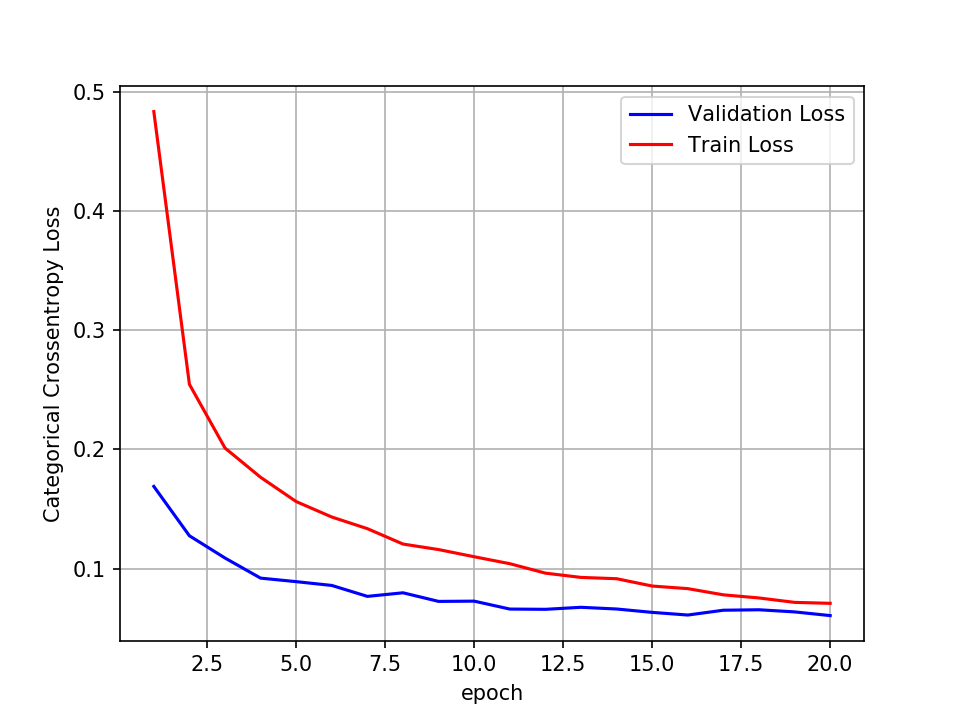

In [23]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


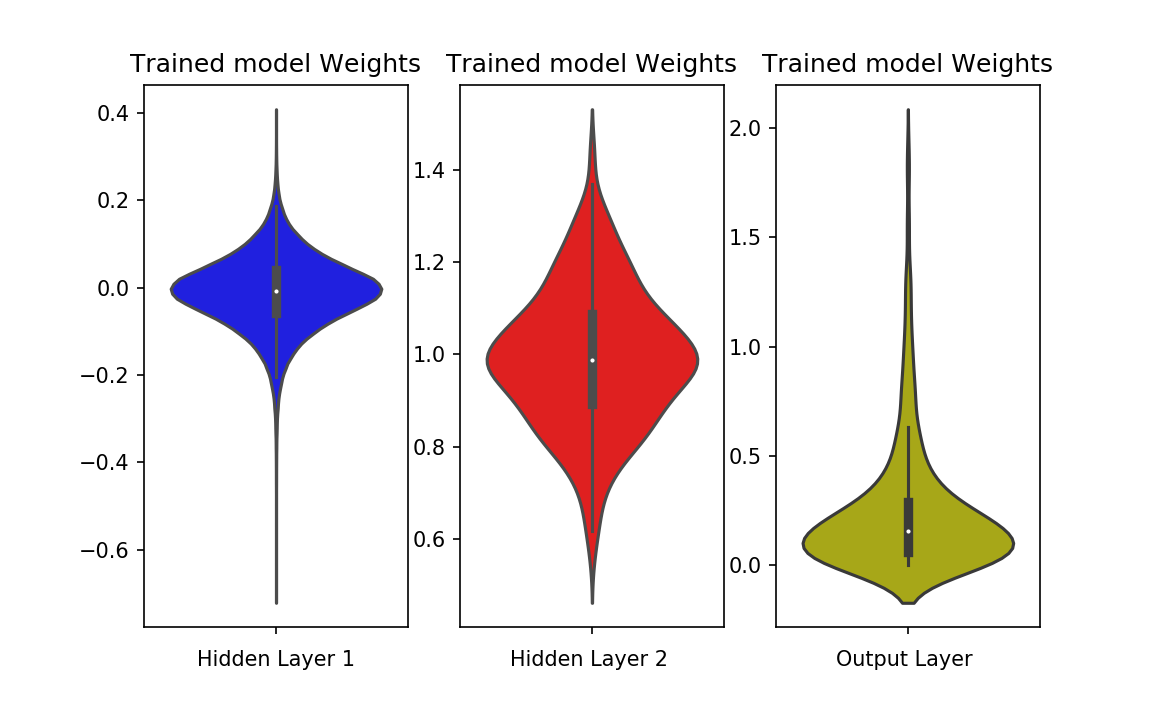

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [24]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model 2 ( 3 hidden layer) 

#### MLP + ReLU + ADAM 

In [37]:
model_relu = Sequential()
model_relu.add(Dense(264, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(108, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 264)               207240    
_________________________________________________________________
dense_24 (Dense)             (None, 108)               28620     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                6976      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 243,486
Trainable params: 243,486
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.2693 - acc: 0.9194 - val_loss: 0.1291 - val_acc: 0.9607
Epoch 2/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1012 - acc: 0.9685 - val_loss: 0.1065 - val_acc: 0.9675
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0662 - acc: 0.9791 - val_loss: 0.0966 - val_acc: 0.9710
Epoch 4/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0454 - acc: 0.9859 - val_loss: 0.0834 - val_acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0372 - acc: 0.9881 - val_loss: 0.0924 - val_acc: 0.9719
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0302 - acc: 0.9897 - val_loss: 0.0953 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0250 - acc: 0.9915 - val_loss: 0.1069 - val_ac

Test score: 0.12013731438038103
Test accuracy: 0.9774


<IPython.core.display.Javascript object>


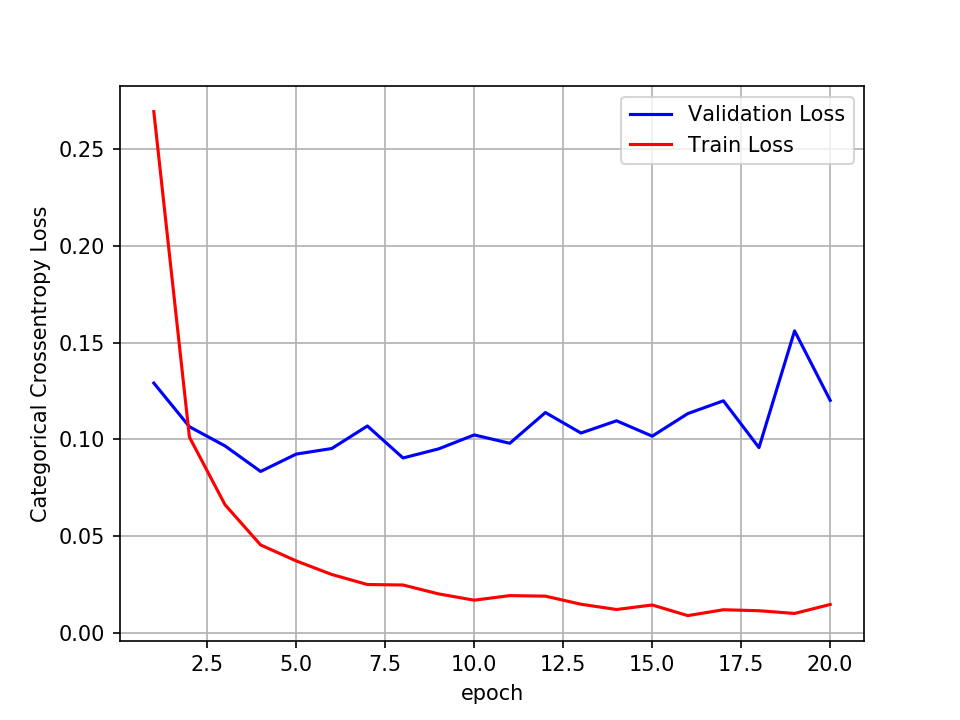

In [39]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


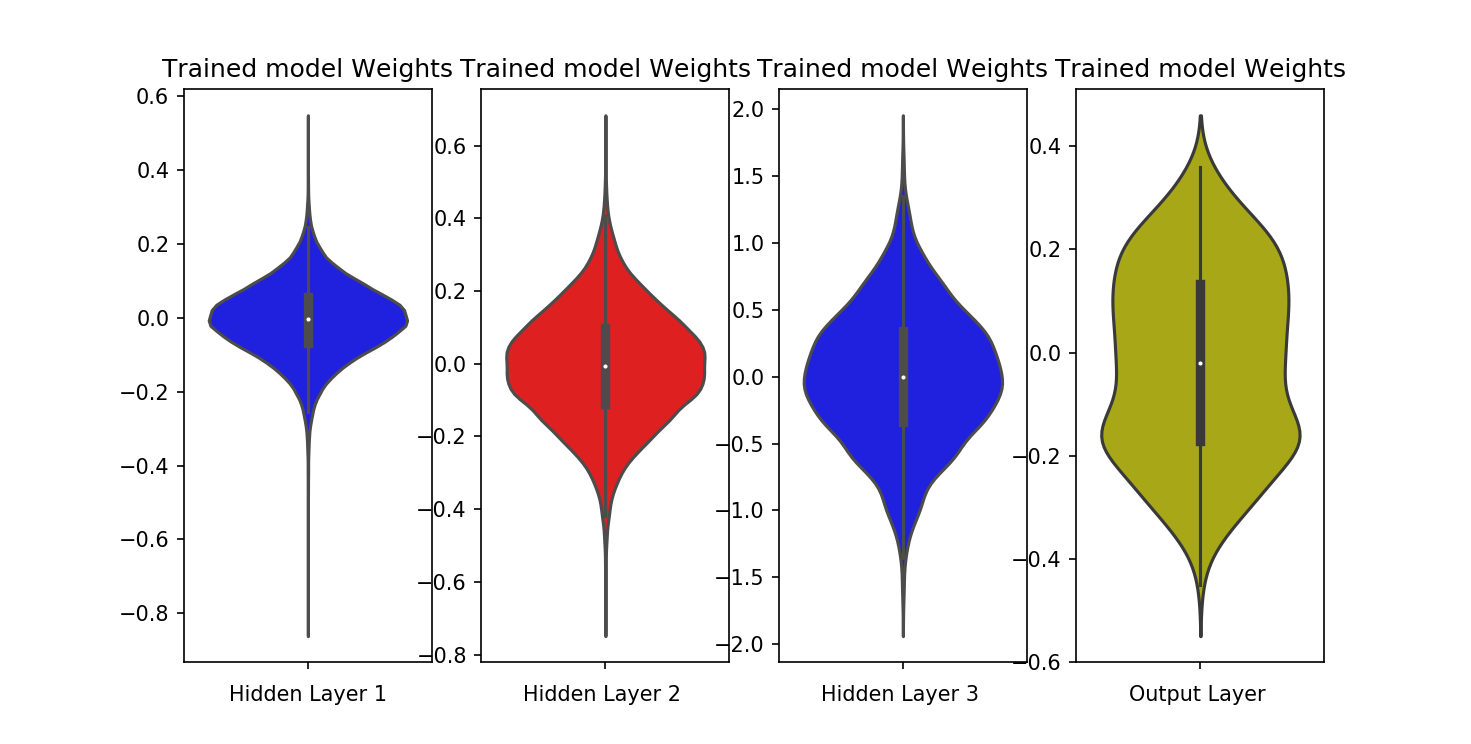

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [46]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### MLP + Batch-Norm on hidden Layers + AdamOptimizer  

In [47]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(264, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(108, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 264)               207240    
_________________________________________________________________
batch_normalization_11 (Batc (None, 264)               1056      
_________________________________________________________________
dense_28 (Dense)             (None, 108)               28620     
_________________________________________________________________
batch_normalization_12 (Batc (None, 108)               432       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                6976      
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total para

In [48]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2561 - acc: 0.9267 - val_loss: 0.1259 - val_acc: 0.9605
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0927 - acc: 0.9724 - val_loss: 0.0953 - val_acc: 0.9692
Epoch 3/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0633 - acc: 0.9802 - val_loss: 0.0821 - val_acc: 0.9756
Epoch 4/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0464 - acc: 0.9854 - val_loss: 0.0934 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0369 - acc: 0.9882 - val_loss: 0.0790 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0294 - acc: 0.9904 - val_loss: 0.0765 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0215 - acc: 0.9934 - val_loss: 0.0834 -

Test score: 0.10386182703253544
Test accuracy: 0.9756


<IPython.core.display.Javascript object>


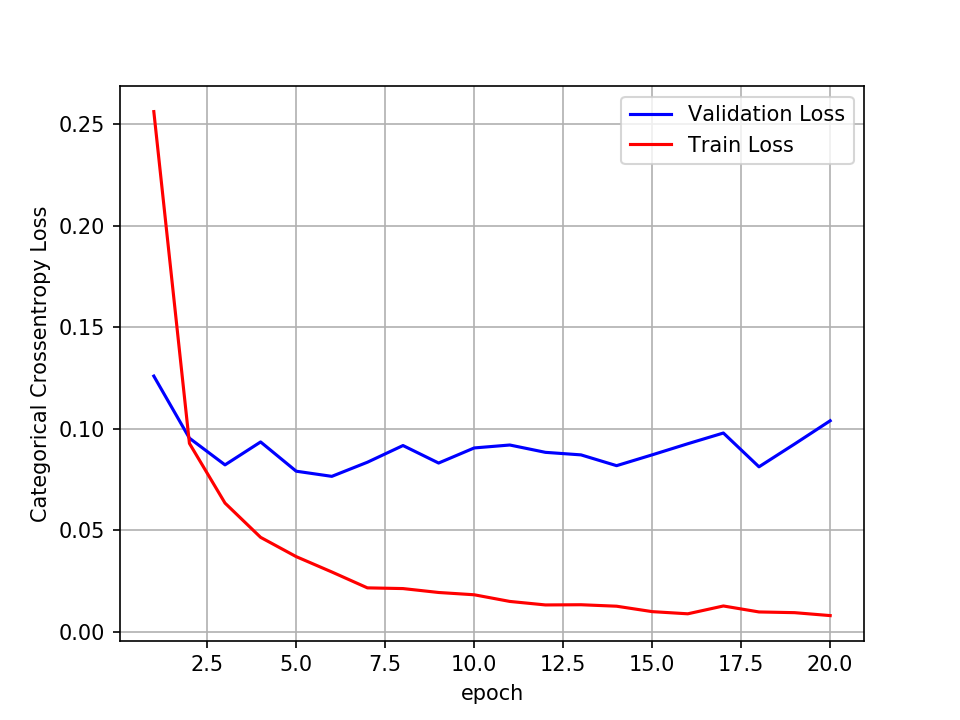

In [49]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


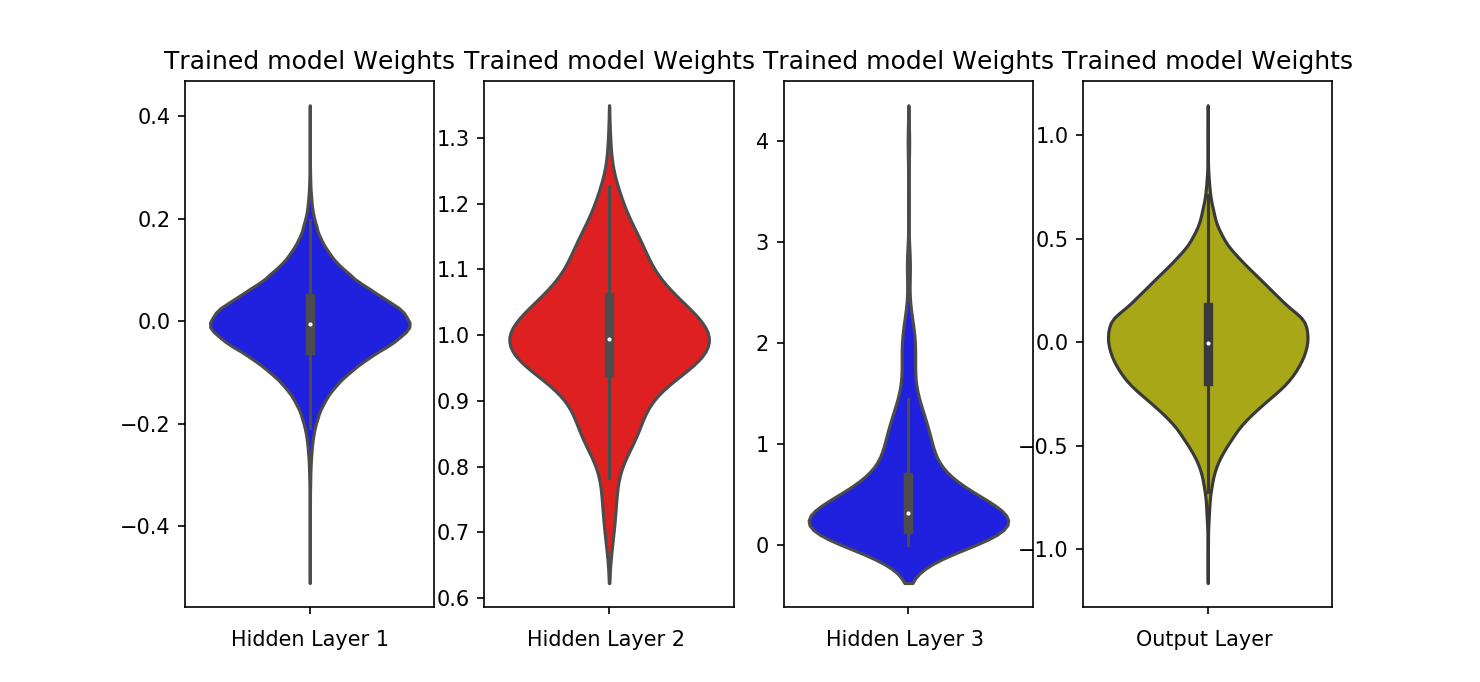

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [50]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### MLP + Dropout + AdamOptimizer 

In [51]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(264, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(108, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 264)               207240    
_________________________________________________________________
batch_normalization_14 (Batc (None, 264)               1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 264)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 108)               28620     
_________________________________________________________________
batch_normalization_15 (Batc (None, 108)               432       
_________________________________________________________________
dropout_7 (Dropout)          (None, 108)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                6976      
__________

In [52]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.9993 - acc: 0.6862 - val_loss: 0.2499 - val_acc: 0.9281
Epoch 2/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.4455 - acc: 0.8712 - val_loss: 0.1848 - val_acc: 0.9423
Epoch 3/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.3386 - acc: 0.9051 - val_loss: 0.1501 - val_acc: 0.9550
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.2863 - acc: 0.9191 - val_loss: 0.1330 - val_acc: 0.9615
Epoch 5/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.2559 - acc: 0.9292 - val_loss: 0.1237 - val_acc: 0.9636
Epoch 6/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.2298 - acc: 0.9362 - val_loss: 0.1171 - val_acc: 0.9655
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2133 - acc: 0.9408 - val_loss: 0.1066 -

Test score: 0.07607038042258937
Test accuracy: 0.9797


<IPython.core.display.Javascript object>


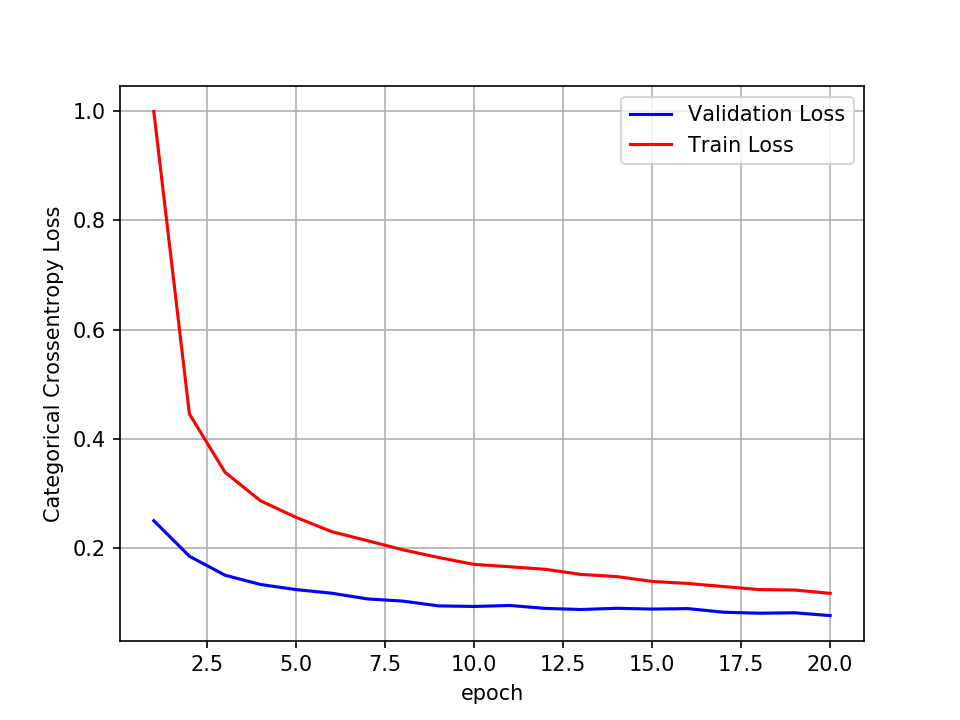

In [53]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


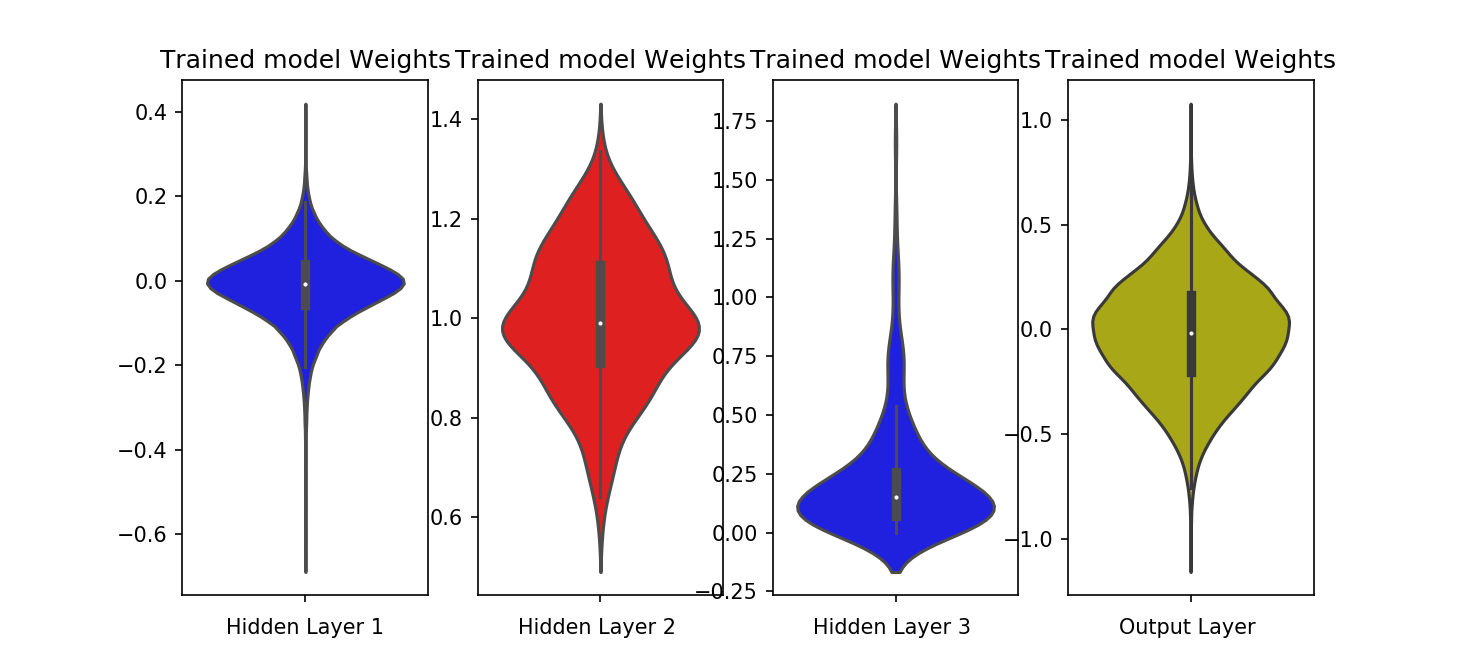

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [54]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model 3 ( 5 hidden layer) 

### MLP + ReLU + ADAM 

In [55]:
model_relu = Sequential()
model_relu.add(Dense(232, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(118, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(75, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_relu.add(Dense(45, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_relu.add(Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 232)               182120    
_________________________________________________________________
dense_36 (Dense)             (None, 118)               27494     
_________________________________________________________________
dense_37 (Dense)             (None, 75)                8925      
_________________________________________________________________
dense_38 (Dense)             (None, 45)                3420      
_________________________________________________________________
dense_39 (Dense)             (None, 25)                1150      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                260       
Total params: 223,369
Trainable params: 223,369
Non-trainable params: 0
_________________________________________________________________
None

In [56]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.3801 - acc: 0.8874 - val_loss: 0.2215 - val_acc: 0.9332
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1259 - acc: 0.9620 - val_loss: 0.1179 - val_acc: 0.9627
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0826 - acc: 0.9748 - val_loss: 0.1286 - val_acc: 0.9609
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0655 - acc: 0.9805 - val_loss: 0.0953 - val_acc: 0.9706
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0497 - acc: 0.9845 - val_loss: 0.1285 - val_acc: 0.9647
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0416 - acc: 0.9868 - val_loss: 0.0987 - val_acc: 0.9723
Epoch 7/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0393 - acc: 0.9872 - val_loss: 0.1309 - 

Test score: 0.11039819117312982
Test accuracy: 0.9752


<IPython.core.display.Javascript object>


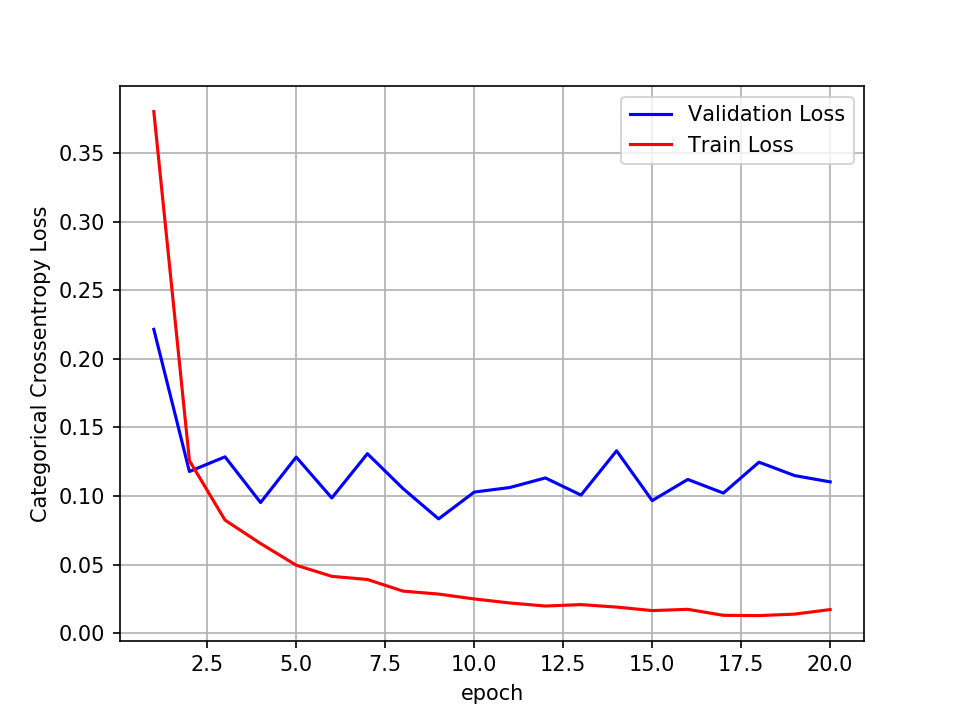

In [57]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


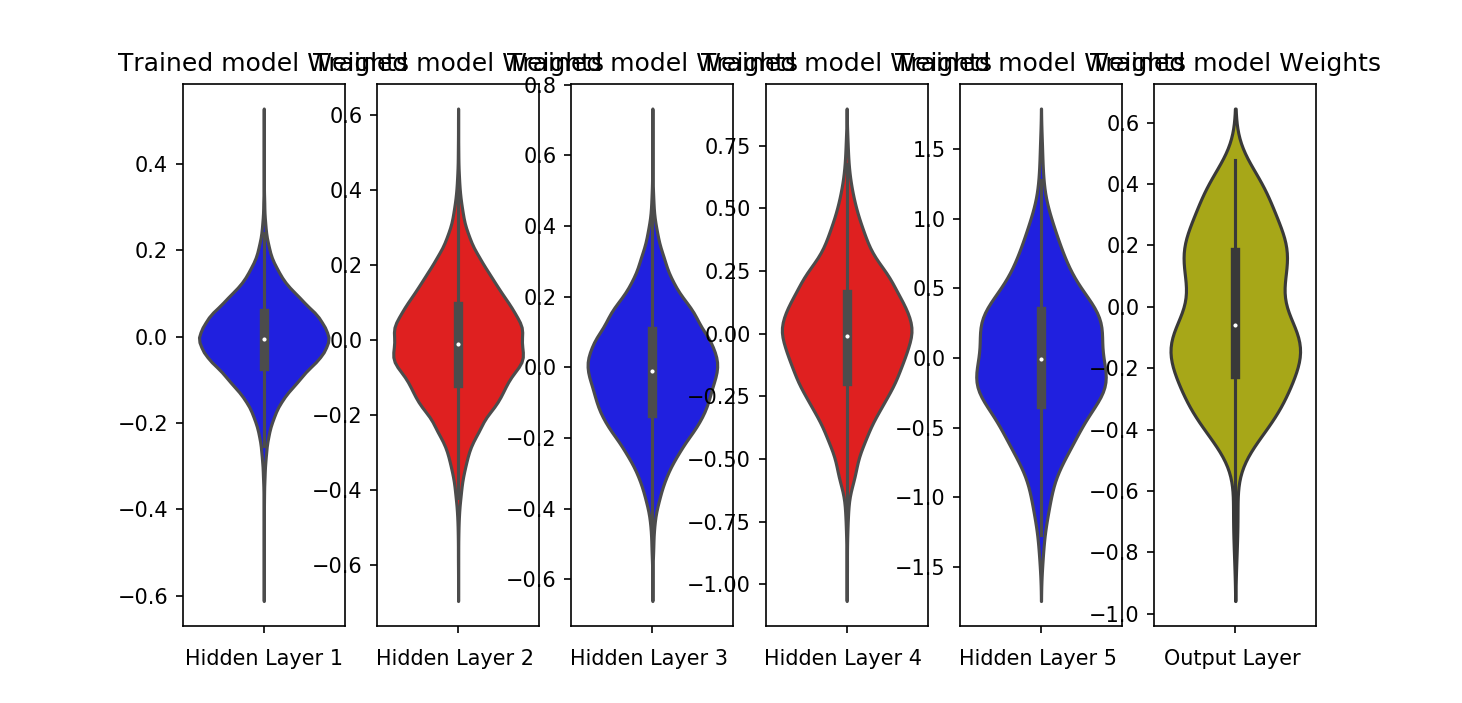

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [59]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + Batch-Norm on hidden Layers + AdamOptimizer 

In [60]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(232, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(118, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(75, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(45, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(25 , activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 232)               182120    
_________________________________________________________________
batch_normalization_17 (Batc (None, 232)               928       
_________________________________________________________________
dense_42 (Dense)             (None, 118)               27494     
_________________________________________________________________
batch_normalization_18 (Batc (None, 118)               472       
_________________________________________________________________
dense_43 (Dense)             (None, 75)                8925      
_________________________________________________________________
batch_normalization_19 (Batc (None, 75)                300       
_________________________________________________________________
dense_44 (Dense)             (None, 45)                3420      
__________

In [61]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.3427 - acc: 0.9073 - val_loss: 0.1515 - val_acc: 0.9545
Epoch 2/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.1142 - acc: 0.9659 - val_loss: 0.1112 - val_acc: 0.9654
Epoch 3/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0751 - acc: 0.9774 - val_loss: 0.0977 - val_acc: 0.9727
Epoch 4/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0615 - acc: 0.9815 - val_loss: 0.0922 - val_acc: 0.9713
Epoch 5/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0498 - acc: 0.9844 - val_loss: 0.0971 - val_acc: 0.9708
Epoch 6/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0418 - acc: 0.9866 - val_loss: 0.1016 - val_acc: 0.9719
Epoch 7/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0337 - acc: 0.9890 - val_loss: 0.

Test score: 0.09605341275081737
Test accuracy: 0.9757


<IPython.core.display.Javascript object>


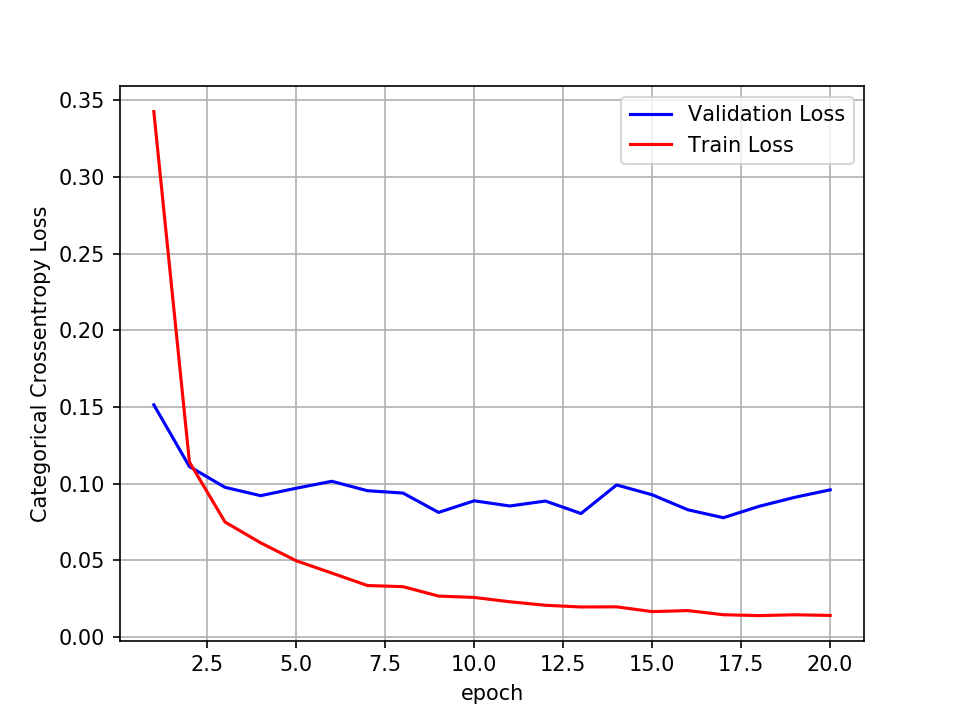

In [62]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


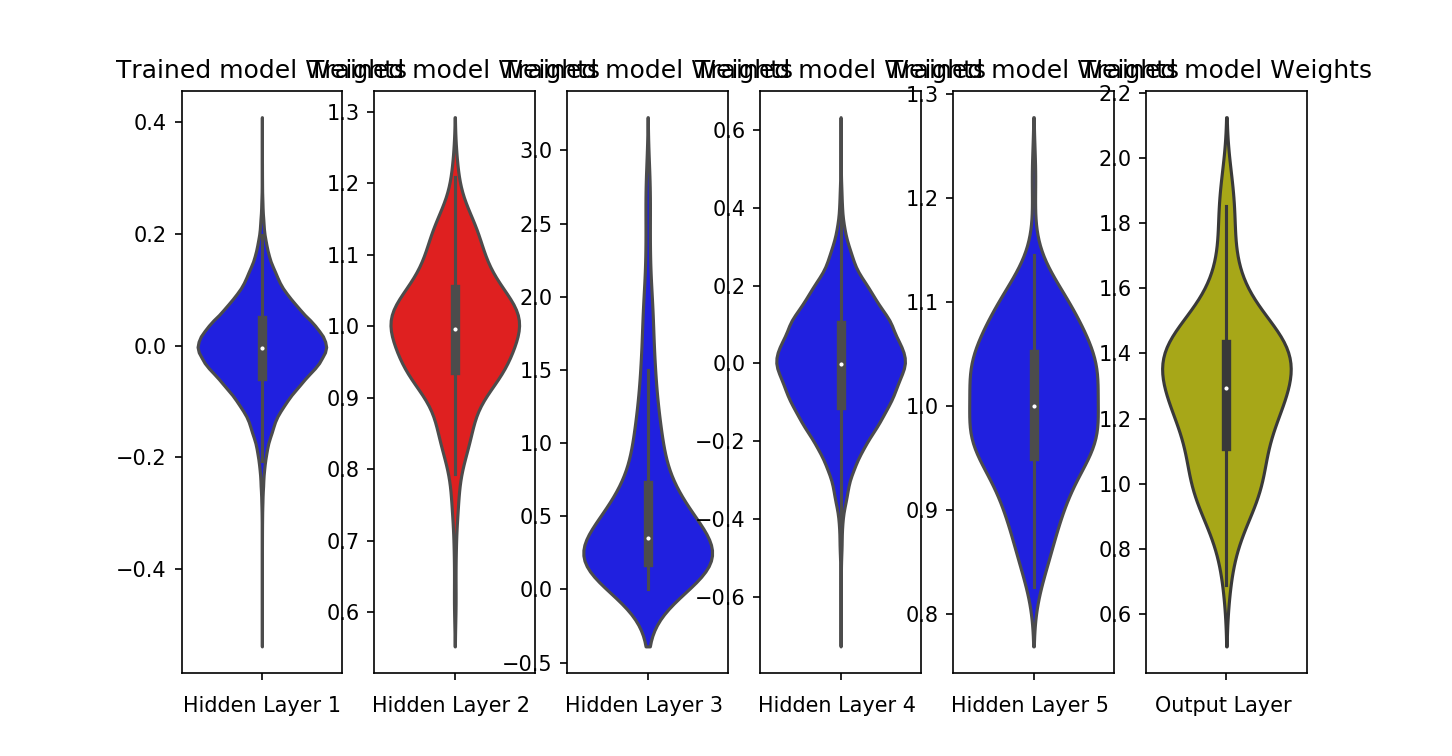

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [64]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='b')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### MLP + Dropout + AdamOptimizer 

In [65]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(232, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(118, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(75, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(45, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 232)               182120    
_________________________________________________________________
batch_normalization_22 (Batc (None, 232)               928       
_________________________________________________________________
dropout_9 (Dropout)          (None, 232)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 118)               27494     
_________________________________________________________________
batch_normalization_23 (Batc (None, 118)               472       
_________________________________________________________________
dropout_10 (Dropout)         (None, 118)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 75)                8925      
__________

In [66]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 302us/step - loss: 1.9605 - acc: 0.3338 - val_loss: 0.8334 - val_acc: 0.8185
Epoch 2/20
60000/60000 [==============================] - 12s 201us/step - loss: 1.1056 - acc: 0.6236 - val_loss: 0.4623 - val_acc: 0.8884
Epoch 3/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.8106 - acc: 0.7363 - val_loss: 0.3271 - val_acc: 0.9212
Epoch 4/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.6562 - acc: 0.8025 - val_loss: 0.2472 - val_acc: 0.9411
Epoch 5/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.5421 - acc: 0.8492 - val_loss: 0.2118 - val_acc: 0.9480
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.4770 - acc: 0.8745 - val_loss: 0.1871 - val_acc: 0.9536
Epoch 7/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.4343 - acc: 0.8884 - val_loss: 0.

Test score: 0.12209293733974919
Test accuracy: 0.9746


<IPython.core.display.Javascript object>


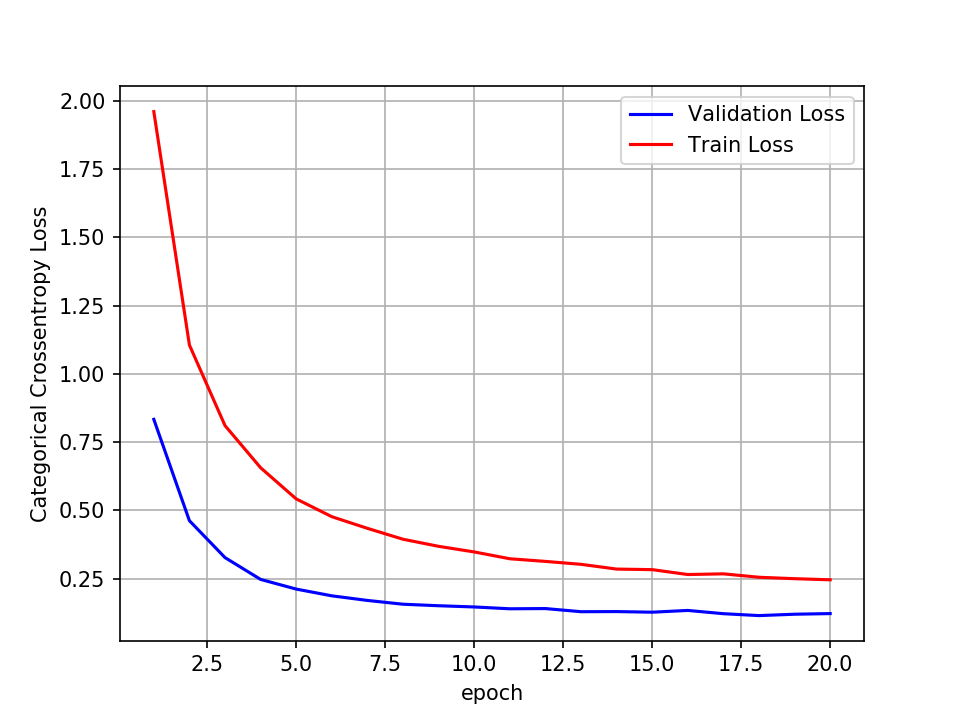

In [67]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


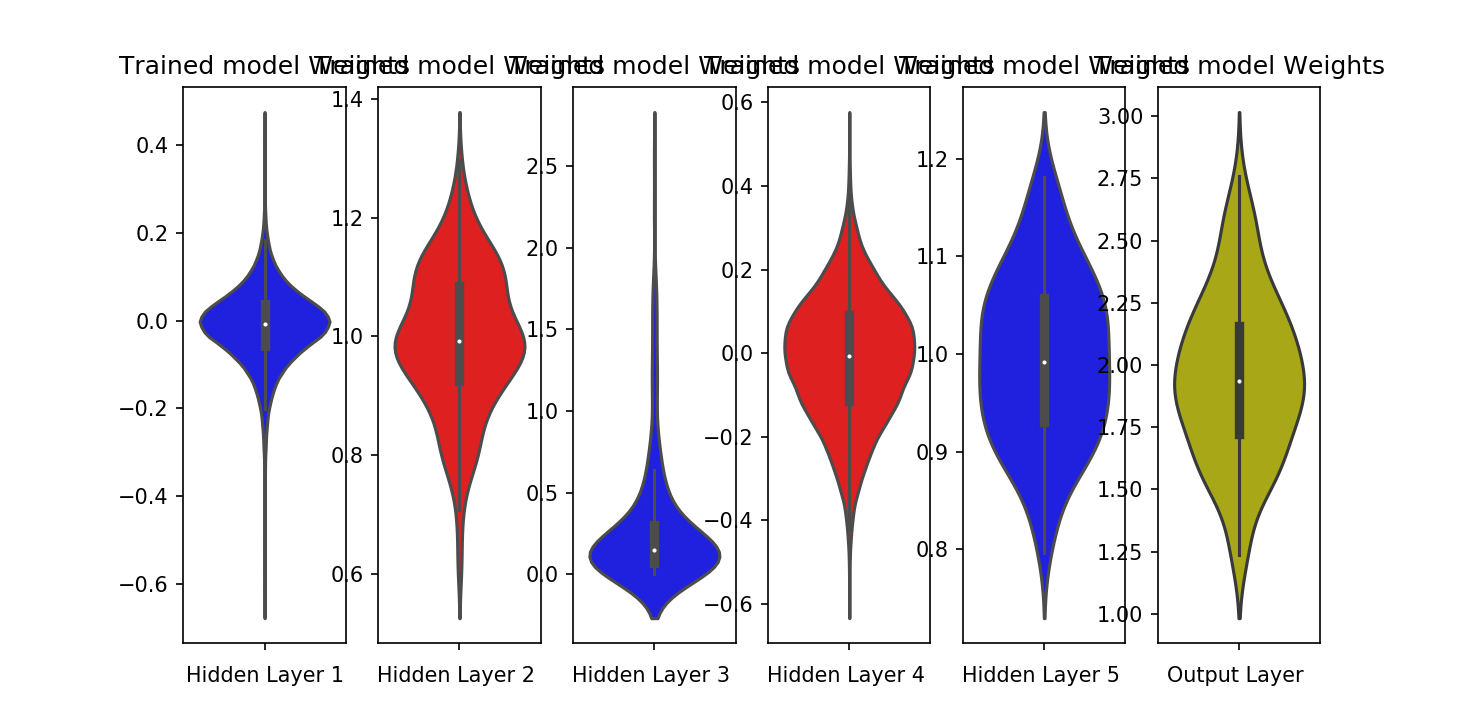

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [68]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='b')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusion

In [79]:
from prettytable import PrettyTable



model1=['2 layers(512-128)','2 layers(512-128)','2 layers(512-128)']
# Names of the models
names =['MLP+ReLU+Adam', 'MLP+BN+ReLU+Adam', 'MLP+DropOut+ReLU+Adam']


# Test Accuracies
test_score=[0.11,0.089,0.060]
test_acc=[0.9782,0.9796,0.9826]


# Initializing prettytable
ptable = PrettyTable()

# Adding columns

ptable.add_column("MODEL",model1)
ptable.add_column("Model Names",names)
ptable.add_column("Test Score",test_score)
ptable.add_column("Test Accuracy",test_acc)

# Printing the Table
print(ptable)



model2=['3 layers(264-108-64)','3 layers(264-108-64)','3 layers(264-108-64)']

# Test Accuracies
test_score3=[0.1201,0.1038,0.076]
test_acc3=[0.9774,0.9756,0.9797]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("MODEL",model2)
ptable.add_column("Model Names",names)
ptable.add_column("Test Score",test_score3)
ptable.add_column("Test Accuracy",test_acc3)

# Printing the Table
print(ptable)



model3=['5 layers(232-118-75-45-25)','5 layers(232-118-75-45-25)','5 layers(232-118-75-45-25)']

# Test Accuracies
test_score5=[0.1103,0.096,0.122]
test_acc5=[0.9752,0.9757,0.9746]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("MODEL",model3)
ptable.add_column("Model Names",names)
ptable.add_column("Test Score",test_score5)
ptable.add_column("Test Accuracy",test_acc5)

# Printing the Table
print(ptable)

+-------------------+-----------------------+------------+---------------+
|       MODEL       |      Model Names      | Test Score | Test Accuracy |
+-------------------+-----------------------+------------+---------------+
| 2 layers(512-128) |     MLP+ReLU+Adam     |    0.11    |     0.9782    |
| 2 layers(512-128) |    MLP+BN+ReLU+Adam   |   0.089    |     0.9796    |
| 2 layers(512-128) | MLP+DropOut+ReLU+Adam |    0.06    |     0.9826    |
+-------------------+-----------------------+------------+---------------+
+----------------------+-----------------------+------------+---------------+
|        MODEL         |      Model Names      | Test Score | Test Accuracy |
+----------------------+-----------------------+------------+---------------+
| 3 layers(264-108-64) |     MLP+ReLU+Adam     |   0.1201   |     0.9774    |
| 3 layers(264-108-64) |    MLP+BN+ReLU+Adam   |   0.1038   |     0.9756    |
| 3 layers(264-108-64) | MLP+DropOut+ReLU+Adam |   0.076    |     0.9797    |
+------